<a href="https://colab.research.google.com/github/NaraConniption/EAS-JST-Kel13/blob/main/JSTkelompok13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Create a directory to extract the contents
extract_dir = "./extracted_dataset"
os.makedirs(extract_dir, exist_ok=True)

zip_file_path = '/content/archive (1).zip' # Changed from '/content/archive.zip'

if not os.path.exists(zip_file_path):
    print(f"Error: The file '{zip_file_path}' was not found.")
    print("Please ensure the zip file is uploaded to the correct path or update the 'zip_file_path' variable.")
    # Exit or raise an error to prevent further execution with a missing file
    raise FileNotFoundError(f"Missing zip file: {zip_file_path}")
else:
    # Unzip the archive
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    print(f"Dataset extracted to: {extract_dir}")

Dataset extracted to: ./extracted_dataset


In [ ]:
print("Contents of the extracted directory:")
for root, dirs, files in os.walk('./extracted_dataset'):
    level = root.replace('./extracted_dataset', '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

Streaming output truncated to the last 5000 lines.
            10484.jpg
            4431.jpg
            32833.jpg
            14031.jpg
            1389.jpg
            53153.jpg
            26425.jpg
            6631.jpg
            25035.jpg
            47916.jpg
            4210.jpg
            36254.jpg
            19157.jpg
            34324.jpg
            59853.jpg
            52412.jpg
            48810.jpg
            7503.jpg
            18465.jpg
            13772.jpg
            59752.jpg
            56592.jpg
            36285.jpg
            31672.jpg
            51213.jpg
            12258.jpg
            14869.jpg
            30312.jpg
            48776.jpg
            38306.jpg
            18608.jpg
            20104.jpg
            41351.jpg
            38833.jpg
            11800.jpg
            36792.jpg
            54547.jpg
            38302.jpg
            37892.jpg
            11730.jpg
            10630.jpg
            44728.jpg
            37966.jpg
        

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# =========================
# 1. TRANSFORM DATASET
# =========================
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Update root paths based on the expected structure after extraction
# Assuming the zip contains a main folder, and inside that main folder there are 'train' and 'test' directories
# You might need to adjust 'root="./extracted_dataset/archive/train"' based on the actual output of the previous cell
train_dataset = datasets.ImageFolder(
    root="./extracted_dataset/train_images", # ADJUST THIS PATH IF NECESSARY
    transform=transform
)

test_dataset = datasets.ImageFolder(
    root="./extracted_dataset/test_images",  # ADJUST THIS PATH IF NECESSARY
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Classes: {train_dataset.classes}")

Number of training samples: 60000
Number of test samples: 10000
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Epoch [1/5], Loss: 0.3235
Epoch [2/5], Loss: 0.0927
Epoch [3/5], Loss: 0.0637
Epoch [4/5], Loss: 0.0510
Epoch [5/5], Loss: 0.0411
Akurasi Testing: 98.51%


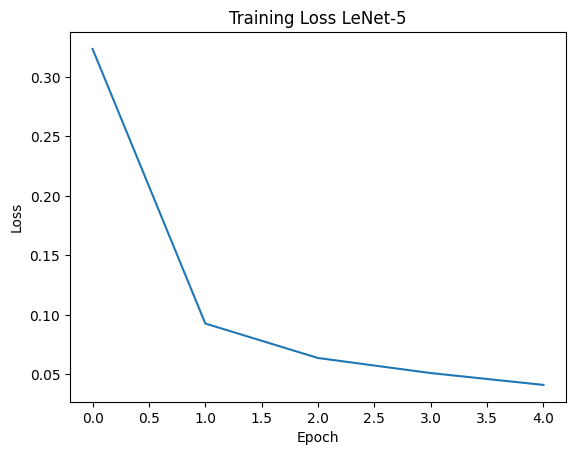

In [ ]:
# =========================
# 2. MODEL LeNet-5
# =========================
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool  = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)

        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, len(train_dataset.classes)) # Dynamically set output classes

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)

        x = torch.relu(self.conv2(x))
        x = self.pool(x)

        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# =========================
# 3. INISIALISASI
# =========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# =========================
# 4. TRAINING
# =========================
num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# =========================
# 5. EVALUASI (TESTING)
# =========================
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Akurasi Testing: {accuracy:.2f}%")

# =========================
# 6. PLOT LOSS
# =========================
plt.figure()
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss LeNet-5")
plt.show()